## Visualization of relationship between country indices and crypto currency value

This notebook will focus on the theory, that x percent of money that gets pulled out of an index, gets put inside crypto
currency.

In [1]:
import numpy as np
import pandas as pd
import  sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [2]:
try:
    conn = sqlite3.connect('../data/gathered/Crypto_index.db')
    cursor = conn.cursor()
except:
    print("Database  couldn ’t get  created/be found")

index_raw = pd.read_sql("select * from  indices", con=conn)
crypto_raw = pd.read_sql("select * from  Crypto", con=conn)

conn.close ()

In [3]:
print(index_raw.info)
index_raw.head()

<bound method DataFrame.info of            date                       index    country        last  \
0    2020-09-21                  S&P Merval  Argentina    41484.06   
1    2020-09-21  S&P/BYMA Argentina General  Argentina  1755630.00   
2    2020-09-21                 S&P/ASX 200  Australia     5822.60   
3    2020-09-21          ASX All Ordinaries  Australia     6013.50   
4    2020-09-21        ASX Small Ordinaries  Australia     2754.40   
..          ...                         ...        ...         ...   
743  2020-09-22               LSE All Share     Zambia     3823.68   
744  2020-09-22                      LSE EN     Zambia      246.89   
745  2020-09-22                     LSE Inv     Zambia      350.98   
746  2020-09-22         Zimbabwe Industrial   Zimbabwe     5438.59   
747  2020-09-22             Zimbabwe Mining   Zimbabwe     3853.21   

           high         low  changeTotal  
0      41514.85    39501.22      1684.17  
1    1756533.00  1673531.00     69052.00 

,date,index,country,last,high,low,changeTotal
0,2020-09-21,S&P Merval,Argentina,41484.06,41514.85,39501.22,1684.17
1,2020-09-21,S&P/BYMA Argentina General,Argentina,1755630.00,1756533.00,1673531.00,69052.00
2,2020-09-21,S&P/ASX 200,Australia,5822.60,5868.50,5808.20,-41.90
3,2020-09-21,ASX All Ordinaries,Australia,6013.50,6060.50,6000.10,-44.10
4,2020-09-21,ASX Small Ordinaries,Australia,2754.40,2784.70,2751.30,-25.60


In [4]:
print(crypto_raw.info)
crypto_raw.head()

<bound method DataFrame.info of            date symbol              name  current_price    market_cap  \
0    2020-09-21    btc           Bitcoin   10640.690000  1.968105e+11   
1    2020-09-21    eth          Ethereum     352.380000  3.971092e+10   
2    2020-09-21   usdt            Tether       1.000000  1.521650e+10   
3    2020-09-21    xrp               XRP       0.237634  1.070361e+10   
4    2020-09-21    bch      Bitcoin Cash     216.300000  4.032451e+09   
..          ...    ...               ...            ...           ...   
195  2020-09-22    sol            Solana       2.800000  1.049266e+08   
196  2020-09-22    tkx  Tokenize Xchange       1.260000  1.010155e+08   
197  2020-09-22     gt         GateToken       0.537676  1.005111e+08   
198  2020-09-22    rvn         Ravencoin       0.014176  1.004625e+08   
199  2020-09-22   wnxm       Wrapped NXM      39.100000  9.986689e+07   

     market_cap_rank  fully_diluted_valuation  total_volume      high_24h  \
0             

,date,symbol,name,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,low_24h,...,price_change_percentage_24h,market_cap_change_24h,market_cap_change_percentage_24h,circulating_supply,total_supply,max_supply,ath,ath_date,atl,atl_date
0,2020-09-21,btc,Bitcoin,10640.690000,1.968105e+11,1,2.234545e+11,2.189182e+10,10984.720000,10636.490000,...,-3.02364,-6.084553e+09,-2.99887,1.849602e+07,2.100000e+07,21000000.0,19665.39,2017-12-16T00:00:00.000Z,67.810000,2013-07-06T00:00:00.000Z
1,2020-09-21,eth,Ethereum,352.380000,3.971092e+10,2,NaN,1.204436e+10,380.570000,352.910000,...,-7.40650,-3.150217e+09,-7.34982,1.126930e+08,NaN,NaN,1448.18,2018-01-13T00:00:00.000Z,0.432979,2015-10-20T00:00:00.000Z
2,2020-09-21,usdt,Tether,1.000000,1.521650e+10,3,NaN,3.729479e+10,1.000000,0.997493,...,0.09279,4.864726e+06,0.03198,1.520030e+10,1.016657e+10,NaN,1.32,2018-07-24T00:00:00.000Z,0.572521,2015-03-02T00:00:00.000Z
3,2020-09-21,xrp,XRP,0.237634,1.070361e+10,4,NaN,1.916560e+09,0.249923,0.237629,...,-4.91526,-5.455162e+08,-4.84941,4.504234e+10,1.000000e+11,NaN,3.40,2018-01-07T00:00:00.000Z,0.002686,2014-05-22T00:00:00.000Z
4,2020-09-21,bch,Bitcoin Cash,216.300000,4.032451e+09,5,NaN,2.259068e+09,230.460000,216.300000,...,-6.14548,-2.378618e+08,-5.57013,1.852361e+07,2.100000e+07,NaN,3785.82,2017-12-20T00:00:00.000Z,76.930000,2018-12-16T00:00:00.000Z


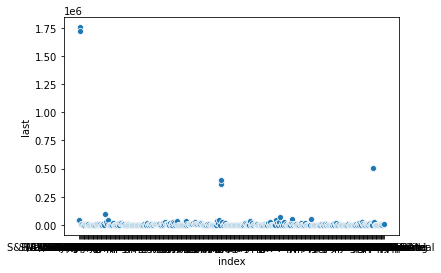

In [5]:
sns.scatterplot(data=index_raw, x="index", y="last")
